## Here is a quick and simple check of the language similarity measure. 

In [61]:
import sys
sys.path.append("/Users/Rui/anaconda/envs/python35/lib/python3.5/site-packages")
# where the packages are located
import os, shutil, nltk,re, scipy
import numpy as np
import math
import itertools
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
os.chdir("/Users/Rui/Box Sync/PSAs/05_Analyses/Rui/language_similarity/")

language = pd.read_csv("de_iden_language_dis_small_n5.csv",encoding = "ISO-8859-1") 
#already sorted data
language_diff_vID_diff_pID = language.loc[(language.same_vID == 0) & (language.same_pID == 0)]
language_same_vID_diff_pID = language.loc[(language.same_vID == 1) & (language.same_pID == 0)]
language_diff_vID_same_pID = language.loc[(language.same_vID == 0) & (language.same_pID == 1)]



In [59]:
language_sim = [language_same_vID_diff_pID ['language_sim'],language_diff_vID_same_pID['language_sim'], language_diff_vID_diff_pID['language_sim']]

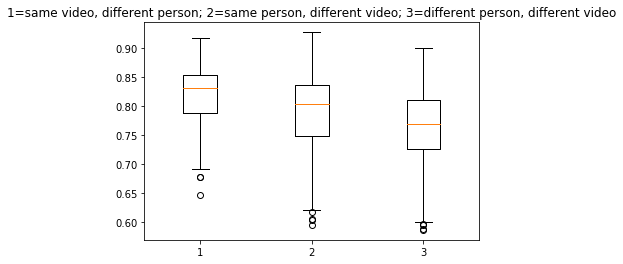

In [60]:
plt.boxplot(language_sim);
plt.title('1=same video, different person; 2=same person, different video; 3=different person, different video')
plt.show()

All three distributions are pairwise significantly different. 


Thus we found that the following ranking: sim[same ad, diff person] > sim[same person, diff ad] > sim[diff ad, diff person]

In [65]:
print(scipy.stats.ttest_ind(language_same_vID_diff_pID ['language_sim'],language_diff_vID_same_pID['language_sim']))
print(scipy.stats.ttest_ind(language_same_vID_diff_pID ['language_sim'],language_diff_vID_diff_pID['language_sim']))
print(scipy.stats.ttest_ind(language_diff_vID_same_pID ['language_sim'],language_diff_vID_diff_pID['language_sim']))

Ttest_indResult(statistic=3.742585948732954, pvalue=0.00020583027997309776)
Ttest_indResult(statistic=8.5074330453587965, pvalue=9.0746314883307633e-17)
Ttest_indResult(statistic=6.2295286382523392, pvalue=6.9128839116437382e-10)


## Top three language pairs

Below we look at transcripts that are rated very similar to each other. 

In [67]:
language[0:1] # same participant talking about "tooth" and "skin"

,1,vID1,vID2,same_pID,same_vID,language_sim,txt1,txt2
0,2,1,2,1,0,0.927899,this- I don't like this commercial (2s) it doe...,this one also I think is disgusting (.) you do...


In [69]:
print(language['txt1'][0])
print(language['txt2'][0])

this- I don't like this commercial (2s) it does show the effect it has on you but um (.) this commercial is nasty in a bad way (2s) I don't want to share this with people watch people peel someone's skin off (.) you can show it has bad body effects in a different way (.) this was just (.) eh no not a fan (.) I gave it a two (.) it gets a two it deserves a two (.) bad commercial 
this one also I think is disgusting (.) you don't need to show the guy pulling out his teeth to show the bad effects smoking has on you (.) there are bunches of different ways to do this (.) I just don't even like looking at this commercial (.) if I can't watch the commercial how am I supposed to learn from the commercial if it's no- I wouldn't share this (.) I wish I gave it a one I gave it a two (2s) it was a bad commercial 


In [68]:
language[1:2] # diff participant, same ad

,1,vID1,vID2,same_pID,same_vID,language_sim,txt1,txt2
1,3,9,9,0,1,0.917524,um (.) this one was like oh do you have a ciga...,one I also think was dumb but (.) kind of funn...


In [70]:
print(language['txt1'][1])
print(language['txt2'][1])

um (.) this one was like oh do you have a cigarette (.) the blonde dude said oh do you have a cigarette and the other dude's like (.) no and he's- the blonde dude's like oh is it cause of all these chemicals in there (.) and he said no it's cause I can only fit one thing in my skinny jeans (.) and then (.) he proceeded to answer a call from his girlfriend and (.) this was okay (.) I guess
one I also think was dumb but (.) kind of funny (.) I don't know why I found it funny (.) it's like- straight up he was like (.) you don't want to smoke (.) like nah man (.) why (.) cause (incomprehensible) (.) nah (.) cause I can't fit anything in my skinny jeans cause I'm skinny (.) what type of (incomprehensible) why you skatingÛª in skinny jeans then your mom calls you how do you even answer through your pants (.) this was dumb but you know a little bit funny he did (incomprehensible) it with his mom I was just like 


In [71]:
language[2:3] # same participant, different ad

,1,vID1,vID2,same_pID,same_vID,language_sim,txt1,txt2
2,4,5,7,1,0,0.910493,uh this was like (.) another one of those litt...,um (.) this is another one of those ones with ...


In [72]:
print(language['txt1'][2])
print(language['txt2'][2])

uh this was like (.) another one of those little guy ones (2s) he was just like dragging people everywhere and being really annoying like (.) you owe me money and like (.) go outside and smoke (.) and (.) it was just kinda weird I guess (.) like (.) I didn't like this one as much as the other two (.) because it was kind of everywhere (2s) yeah 
um (.) this is another one of those ones with the little guys who are really possessive and annoying (.) and basically he was ruining this guy's prom (.) um (.) by just sort of taking over and being like no we gotta go we gotta go (.) oh you can't do this (.) and it was the same sort of idea with that other drummer boy (.) um (.) these were really cool and I kinda like these commercials 
